<img src="img/usmlogo.png" style="float:right;height:100px">
<img src="img/dilogo.png" style="float:left;height:100px">
<center>
    <h1> Laboratorio 4 Estadística Computacional </h1>
    <h2> Profesor: Ricardo Ñanculef </h2>
    <h3> Ayudante: Gabriel Ortega </h3>
</center>
<p>
<center><h4>Julio 2018</h4></center>
</p>

#### Integrantes:

*Benjamín Jorquera 201473521-9 Malla Nueva*

Se importaran las siguientes librerías para el desarrollo del presente notebook:

In [1]:
import math
import random
import statistics
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats as spy
from pandas import *
import statsmodels.api as sm
from scipy.stats import t

# Filtrador de warnings
import warnings
warnings.filterwarnings('ignore')

# Carga R magic
%load_ext rpy2.ipython

from IPython.display import display, HTML

CSS = """
.output {
    align-items: center;
}
"""

HTML('<style>{}</style>'.format(CSS))

### 1.- Análisis Exploratorio

a) Haga un análisis exploratorio del dataset "student-por.csv". Este dataset consiste en los datos recopilados de una encuesta realizada a alumnos de dos escuelas de portugués. El dataset contiene información sobre el desempeño académico y otros datos relacionados a los alumnos del curso (Refiérase al archivo *student.txt* para mayor información). De este análisis debe obtener al menos 4 conclusiones respaldadas por gráficos u otra evidencia del trabajo realizado.

Notas finales de la escuela GP


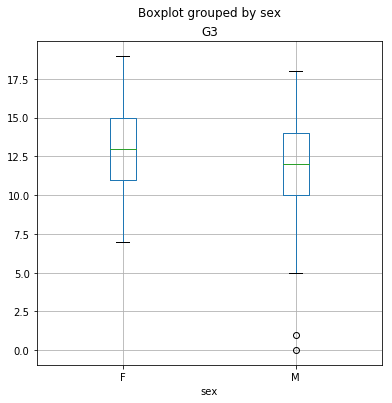

In [2]:
df = pd.read_csv('student-por.csv', sep=';').set_index('school', drop=True)

#Separamos el data frame por escuela
df2 = df.loc["GP":"GP"].reset_index(drop=True)
df3 = df.loc["MS":"MS"].reset_index(drop=True)

df4 = df2.loc[:,['sex','G1','G2','G3']]
df5 = df3.loc[:,['sex','G1','G2','G3']]

fig, ax = plt.subplots(figsize=(6,  6))
print("Notas finales de la escuela GP")
df4.boxplot(["G3"], 'sex', ax)
plt.show()

Notas finales de la escuela MS


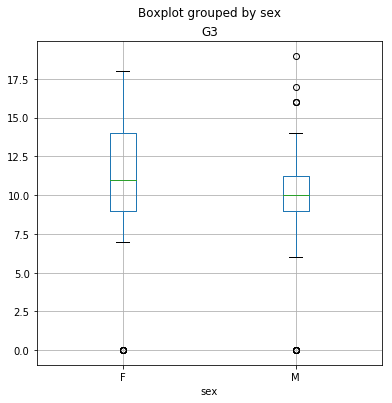

In [3]:
fig, ax = plt.subplots(figsize=(6,  6))
print("Notas finales de la escuela MS")
df5.boxplot(["G3"], 'sex', ax)
plt.show()

1. Se puede observar a partir de la concetración de notas y el sexo de las dos escuelas, una tendencia a que las mujeres tengan un mejor promedio general que los hombres y por ende mejores calificaciones.

2. Existe una mayor cantidad de outliers en la población hombres.

3. La dispersión de notas de la población de mujeres en la escuela MS es mucho mayor que la población de hombres, por otro lado GP no presenta esta diferencia tan grande de dispersión.

4. La escuela GP presenta mejores calificaiones que la escuela MS, considerando que el 50% de la población de la escuela GP de mujeres y hombres es significativamente mayor que la escuela MS, como se muestra en los bloxplots.

### 2.- Intervalos de Confianza y Método Bootstrap 

#### Bootstrap

Suponga que tiene una muestra  **M** de una población **P** y esta muestra **M** es de tamaño **N**. Queremos obtener algún estimador $ \theta $ de **P** a partir de **M** ya sea la media, varianza, o alguna otra función que interese, obviamente este estimador tendrá un error asociado ya que no es el estimador de la población. Uno de los métodos para determinar intervalos de confianza es el método bootstrap que permite trabajar solamente con una muestra de la población.

Podemos entender bootstrap de la siguiente manera: Suponga que tenemos en una bolsa papelitos con cada elemento de la muestra **M**, sacamos un papelito, **lo volvemos a guardar en la bolsa** y repetimos este proceso **N** veces hasta tener una muestra $M^{1*}$ y sobre esta muestra de la muestra aplicamos la función que queremos conocer (media, varianza, etc) teniendo un estimador $ \theta ^{1*} $ . Luego repetimos este proceso **B** veces y terminamos con un conjunto de **B** estimadores. La distribución de los estimadores será una curva (no tiene que ser necesariamente normal) por lo que se puede calcular intervalos de confianza de la siguiente forma:

<img src="img/curva.png">

En esta sección trabaje con los archivos "muestra_edad.csv" y "student-por.csv". El objetivo es obtener intervalos de confianza para la media de las edades de los alumnos que respondieron la encuesta (student-por.csv) usando solamente una muestra de ellos "muestra_edad.csv"

b) Utilice el método bootstrap para construir intervalos de confianza de 90%, 95% y 99% nivel de confiabilidad para la media de las edades.

In [4]:
#Guardamos el Dataset
df = pd.read_csv('muestra_edad.csv', sep=';')
df = df["x"].values

#Creamos la lista que contendra 1000 estimadores de la media
estimadores = [0]*1000

#Ejecutamos método bootstrap
for i in range(1000):
    suma = 0
    for j in range(len(df)):
        suma+=random.choice(df) #Escoge valores random dentro de la muestra
    suma = suma / len(df)
    estimadores[i] = suma

#Ordenamos la lista de estimadores
estimadores.sort()

#Imprimimos los intervalo
print(estimadores[100], estimadores[900])
print(estimadores[50], estimadores[950])
print(estimadores[10], estimadores[990])

16.643874643874643 16.797720797720796
16.618233618233617 16.82051282051282
16.584045584045583 16.86894586894587


Utilizando el método bootstrap para la media se tienen los siguientes intervalos de confianza con nivel de confiabilidad 90%, 95% y 99% respectivamente:

$$IC_{0.1} = [16.64,16.8]$$
$$IC_{0.05} = [16.62,16.82]$$
$$IC_{0.01} = [16.58,16.87]$$

d) Construya intervalos de confianza con un nivel de 90%, 95% y 99% de confiabilidad para la **mediana** de las edades. Explique qué método utilizó (bootstrap o convencional).

In [5]:
#Guardamos el Dataset
df = pd.read_csv('muestra_edad.csv', sep=';')
df = df["x"].values

#Creamos la lista que contendra 1000 estimadores de la mediana
estimadores = [0]*1000

#Ejecutamos método bootstrap
for i in range(1000):
    datos = list()
    for j in range(len(df)):
        datos.append(random.choice(df)) #Escoge valores random dentro de la muestra
    datos.sort()
    estimadores[i] = datos[int((len(df)+1)/2)]

#Ordenamos la lista de estimadores
estimadores.sort()

#Imprimimos los intervalo
print(estimadores[100], estimadores[900])
print(estimadores[50], estimadores[950])
print(estimadores[10], estimadores[990])

17 17
17 17
17 17


Utilizando el método bootstrap para la mediana se tienen los siguientes intervalos de confianza con nivel de confiabilidad 90%, 95% y 99% respectivamente:

$$IC_{0.1} = [17,17]$$
$$IC_{0.05} = [17,17]$$
$$IC_{0.01} = [17,17]$$

### 3.- Contraste de Hipótesis

La mínima nota para aprobar corresponde a 11, si separamos a la población en dos grupos: "Aprobados" y "Reprobados":

a) Haga un contraste de hipótesis utilizando métodos clásicos para determinar si la proporción de alumnos de la escuela Gabriel Pereira es igual en ambas poblaciones o no.

In [6]:
#Separamos el dataframe
df2 = df2.loc[:,['G3']]

#Generamos la listas aprobados y reprobados
aprobados = list()
reprobados = list()

#Aplicamos la condicion de aprobación para llenar las listas
for i in df2["G3"].values:
    if(i >= 11):
        aprobados.append(i)
    else:
        reprobados.append(i)
        
#Calculamos las frecuencias muestrales
p_1 = len(aprobados)/len(df2["G3"])
p_2 = len(reprobados)/len(df2["G3"])

#Calculamos el valor de p gorro
p = (len(aprobados)*p_1 + len(reprobados)*p_2)/(len(aprobados)+len(reprobados))

#Calculamos el valor de z
z = (p_1 - p_2)/((p*(1-p)*((1/len(aprobados))+(1/len(reprobados)))))**(1/2)

#Generamos una distribución normal con nivel de significancia 0.1
ci = spy.norm.interval(0.95, loc=0, scale=1)

#Si se cumple esta condicion es suficiente para rechazar la hipotesis H0
if(z <= ci[1] or z >= ci[0]):
    print(z, "Rechazar H0")

10.557059735640298 Rechazar H0


Para dos proporciones $p_1$ y $p_2$ desconocidas representadas por aprobados/reprobados se tiene la siguiente hipótesis nula:

$$H_0 : p_1 = p_2$$
$$H_1 : p_1 \neq p_2$$

Donde el valor del Estadístico de Contraste bajo $H_0$ es:

$$z = \frac{\hat{p_1}-\hat{p_2}}{\sqrt{\hat{p}(1-\hat{p})}\sqrt{\frac{1}{n_1}+\frac{1}{n_2}}}$$

Donde: $$\hat{p} = \frac{n_1\hat{p_1}+n_2\hat{p_2}}{n_1 + n_2}$$

Así rechazamos que las proporciones son iguales si es que $z \leq Z_{1-\frac{\alpha}{2}}$ o $z \geq Z_{\frac{\alpha}{2}}$. Como el valor de $z \approx 10.56$ rechazamos $H_0$.

b) Investigue lo que es un *Permutation Test*, explique en qué consiste y utilícelo para trabajar el inciso a) de esta sección.

Recuerde explicar **bien** su procedimiento.

Una prueba de permutación (también llamada prueba de aleatorización o prueba exacta) es un tipo de prueba de significación estadística en la que la distribución de la estadística de prueba bajo la hipótesis nula se obtiene al calcular todos los valores posibles de la estadística bajo reordenamientos de las etiquetas en los puntos de datos observados. En otras palabras, el método por el cual los tratamientos se asignan a los sujetos en un diseño **experimental** se refleja en el análisis de ese diseño. Si las etiquetas son intercambiables bajo la hipótesis nula, entonces las pruebas resultantes producen **niveles de significancia exactos**.

p-value = 0.0


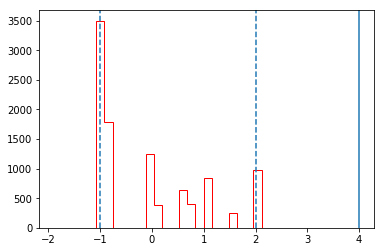

In [7]:
x = aprobados
y = reprobados

#Generar permutaciones de etiquetas para 10000 comparaciones
n1, n2 = map(len, (x, y))
reps = 10000
data = np.r_[x, y]
ps = np.array([np.random.permutation(n1+n2) for i in range(reps)])

#Estimar la distribución empírica nula para las diferencias entre muestras
xp = data[ps[:, :n1]]
yp = data[ps[:, n1:]]
samples = np.percentile(xp, 7, axis=1) - np.percentile(yp, 7, axis=1)

#Graficar resultados
plt.hist(samples, 25, histtype='step', color='red')
test_stat = np.percentile(x, 7) - np.percentile(y, 7)
plt.axvline(test_stat)
plt.axvline(np.percentile(samples, 2.5), linestyle='--')
plt.axvline(np.percentile(samples, 97.5), linestyle='--')
print("p-value =", 2*np.sum(samples >= np.abs(test_stat))/reps)

Así el p valor resultante del remuestreo o prueba de permutaciones es: 0.

Ahora usando el Método Monte Carlo se puede crear una prueba de permutación asintóticamente equivalente cuando hay demasiadas combinaciones posibles de los datos para permitir la enumeración completa de una manera conveniente. Esto se hace generando la distribución de referencia por muestreo de Monte Carlo, que toma una muestra aleatoria pequeña (relativa al número total de permutaciones) de las posibles repeticiones.

In [8]:
#Función Método de Monte Carlo para pruebas de permutaciones
def exact_mc_perm_test(xs, ys, nmc):
    n, k = len(xs), 0
    diff = np.abs(np.mean(xs) - np.mean(ys))
    zs = np.concatenate([xs, ys])
    for j in range(nmc):
        np.random.shuffle(zs)
        k += diff <= np.abs(np.mean(zs[:n]) - np.mean(zs[n:]))

    return k / nmc

#Usamos las listas de las poblaciones de aprobados y reprobados como parámetros
print(exact_mc_perm_test(x, y, 3000))

0.0


El cual genera como resultado el **p valor** = 0, un valor bastante audaz para seguir rechazando $H_0$.

### 4.- Regresión Lineal.

En esta sección se trabajará con las columnas G1, G2 y G3 del dataset "student-por.csv". El objetivo será encontrar un modelo que permita predecir la Nota final en base al promedio de los periodos (G1 y G2). Primero es necesario tener una noción tangible y visual de las variables que queremos trabajar para saber qué esperar del modelo en cuestión.

In [9]:
#Generamos el dataframe a partir del archivo csv
df = pd.read_csv('student-por.csv', sep=';')

#Calculamos la media entre las notas de G1 y G2 para cada estudiane del dataset
notas = pd.concat((df["G1"],df["G2"]), axis = 1).mean(axis=1)

#Dataset variable 1
print(notas.describe())

count    649.000000
mean      11.484592
std        2.732364
min        2.000000
25%        9.500000
50%       11.500000
75%       13.500000
max       18.500000
dtype: float64


In [10]:
#Dataset variable2
print(df["G3"].head())

0    11
1    11
2    12
3    14
4    13
Name: G3, dtype: int64


a) Utilice la función scatter.smooth (En R) para visualizar la relación entre las variables y haga un análisis cualitativo de lo que observa en dicho gráfico.

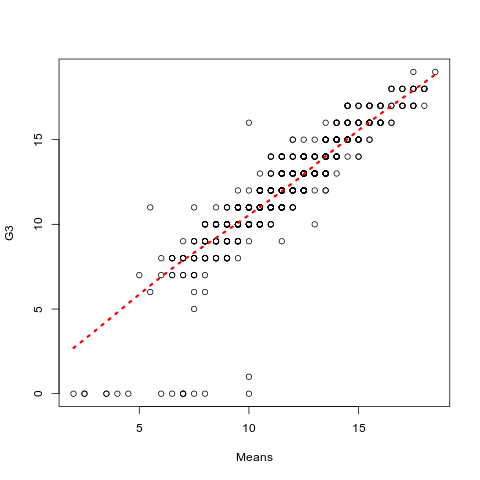

In [11]:
%%R
#Se lee el dataset desde el archivo csv
data <- read.csv("student-por.csv", sep=';')

#Se crea una columna "mean" que contendra el promedio de las calificaciones G1 y G2 de cada estudiante
data$mean <- rowMeans(data[c("G1", "G2")], na.rm = TRUE)
Means <- data$mean

#Se guarda la columna G3
G3 <- data$G3

#Generamos la gráfica suave
require(graphics)
with(data, scatter.smooth(Means, G3, lpars= list(col = "red", lwd = 3, lty = 3)))

Análisis: Podemos observar que la tasa de aprobación de los estudiantes aumenta a medida que aumenta el promedio entre las calificaciones que obtuvieron en el primer periodo y el segundo periodo, es decir, la relación entre estas dos variables podría presentar un modelo lineal.

b) Realice un boxplot de ambas variables y comente lo que se observa del gráfico.

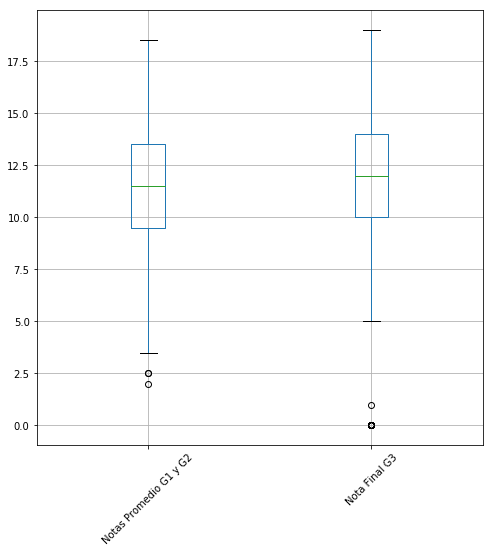

In [12]:
#Dataframes de las muestras separadas en dos grupos.
df2 = pd.DataFrame([('Notas Promedio G1 y G2', notas), ('Nota Final G3', df['G3'])],
                   columns=['Variable', 'Muestra']).set_index('Variable')

#Gráfico de BoxPlot
df2['Muestra'].apply(lambda x: pd.Series(x)).T.boxplot(figsize=(8,8),rot=45)
plt.show()

c) Grafique las curvas de densidad de ambas variables e incluya el valor de la asimetría (*skewness*) en dicho gráfico. *R Hint:* Use la librería e1071 para calcular la asimetría y la función *round()* para limitar la cantidad de dígitos. Concluya a partir de lo que ve en ambos gráficos.

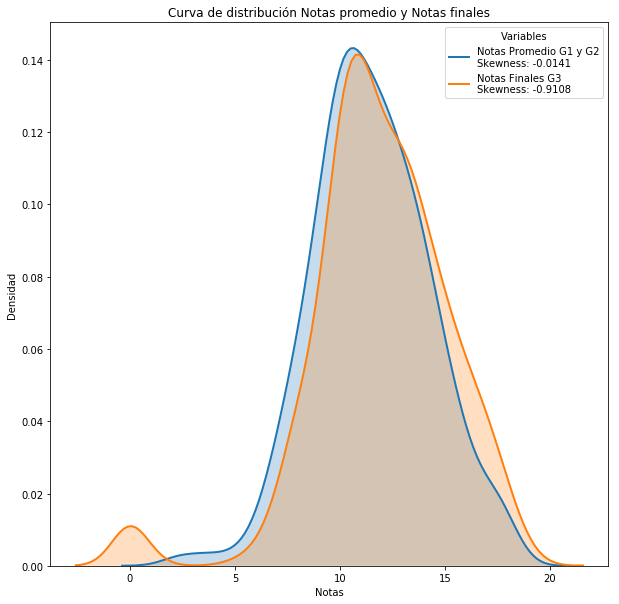

In [13]:
#Calculamos la asimetría de la variable promedio de notas y la variable nota final G3
skew1 = round(spy.skew(notas),4)
skew2 = round(spy.skew(df["G3"]), 4)

#Graficamos sus funciones de probabilidad
plt.figure(figsize=(10,10))
sns.distplot(notas, hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 2},
             label = "Notas Promedio G1 y G2\nSkewness: " + str(skew1))
sns.distplot(df['G3'], hist = False, kde = True,kde_kws = {'shade': True, 'linewidth': 2},
             label = "Notas Finales G3\nSkewness: " + str(skew2))

#Configuración de la gráfica
plt.legend(prop={'size': 10}, title = 'Variables')
plt.title('Curva de distribución Notas promedio y Notas finales')
plt.xlabel('Notas')
plt.ylabel('Densidad')
plt.show()

Observamos que ambas curvas de densidad son casi identicas y que las asimetrías tienen un valor negativo, es decir, la "cola" a la izquierda de la media es más larga que la de la derecha. Para el caso del promedio entre G1 y G2 no es tanta la diferencia ya que tiene una asimetría más cercana al 0, es decir, la curva azul se encuentra ligeramente más centrada, por otro lado la variable de las notas finales G3 presenta una mayor diferencia o distribución de valores a la izquierda de la curva con respecto a la media, lo cual podemos confirmar mirando los valores alrededor del 0 en la curva de color naranjo.

d) Calcule la correlación entre las dos variables. ¿El valor obtenido tiene relación al análisis previamente realizado?

In [14]:
print(np.corrcoef(notas, df['G3']))

[[1.         0.90488844]
 [0.90488844 1.        ]]


Nos encontramos con una correlación $r \approx 0.9$, la cual es positiva y fuerte (cercana a 1) indicando que tan relacionadas están las variables de estudio, esto significa que es *posible* que se relacionen de forma lineal, como se argumentó previamente en el analisis del gráfico suave y en la semejanza de sus curvas de densidad.

e) Cree el modelo de regresión lineal utilizando la funcion *lm()* (En R) especifique el modelo que resulta.

In [15]:
%%R
linearMod <- lm(Means ~ G3, data = data)
summary(linearMod)


Call:
lm(formula = Means ~ G3, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-5,2912 -0,7606 -0,0259  0,6475  7,6273 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2,37269    0,17459   13,59   <2e-16 ***
G3           0,76532    0,01415   54,08   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0,001 ‘**’ 0,01 ‘*’ 0,05 ‘.’ 0,1 ‘ ’ 1

Residual standard error: 1,164 on 647 degrees of freedom
Multiple R-squared:  0,8188,	Adjusted R-squared:  0,8185 
F-statistic:  2924 on 1 and 647 DF,  p-value: < 2,2e-16



A partir de los coeficientes de regresión se tiene que el modelo de regresión resultante es de la forma:

$$Y = (\beta_1 * x) + \beta_0 + \epsilon$$

Donde Y: Promedio G1 y G2, x: Nota Final G3, $\beta_0 \approx 2.38$, $\beta_1 \approx 0.77$ y $\epsilon$: término de error aleatorio.
___

Un indicador de la bondad del ajuste corresponde a $R^2$

$$R^2 = \frac{TSS-RSS}{TSS} = 1 - \frac{RSS}{TSS}$$

donde $TSS$, la suma total de los cuadrados o *Total Sum of Squares*, mide la varianza total en la respuesta y se calcula como $TSS = \sum_{i=1}^{n}({Y_{i} - \bar{Y}})^2$. La variable $RSS$ que aparece corresponde a la suma de los cuadrados de los residuos $RSS = \sum_{i=1}^{n}(Y_{i} - \hat{Y})^{2}$.

f) Calcule $R^2$ e interprete su valor.

In [16]:
#Guardamos los valores de beta_0 y beta_1 calculados previamente
beta_0 = 2.37269
beta_1 = 0.76532

#Definimos la función del modelo
def model(x):
    return beta_0 + (beta_1*float(x)) 

#Calculamos la suma total de los cuadrados y la suma de los cuadrados de los residuos
TSS = 0
RSS = 0
for i, j in zip(notas.values, df["G3"].values):
    TSS+= (i-statistics.mean(notas))**2
    RSS += (i-model(j))**2
    
#Calculamos el indicador de bondad
R = (1-(RSS/TSS))
print(R)

0.8188230930183987


Por lo tanto el coeficiente de determinación se mide en tantos porciento y corresponde a:

$$R^2 \approx 0.82$$

Como la varianza residual no es tan significativa podemos decir que el modelo explica el 82% de valores de la variables aproximadamente, es decir, el modelo es confiable.

g) ¿El modelo que obtuvo es estadísticamente significativo? Explique por qué. 

Existe evidencia estadistica para suponer que es poco probable que el resultado del modelo haya sido debido al azar, pero esta evidencia no es suficiente por lo que se deberá realizar un contraste de hipótesis.
___
Es posible realizar un test de hipótesis para determinar si existe una relación entre las variables X e Y o no, esto se traduce a trabajar con la hipótesis nula (No hay relación entre X e Y): $$ H_{0}: \hat{a} = 0$$ $$ H_{a}:\hat{a}\neq 0$$

Recuerde que al hacer regresión lineal construye un modelo de índole: $\hat{Y} = \hat{a}\cdot X + \hat{b} + \epsilon$. Para realizar el contraste de hipótesis tenga en mente lo siguiente:

Es necesario calcular un estadístico de t student utilizando la siguiente fórmula:
$$t = \frac{\hat{a}-0}{SE(\hat{a})}$$

Donde $SE(\hat{a})$ se refiere al error stándar de $\hat{a}$ y se puede obtener de la siguiente forma:

$$SE(\hat{a})^2 = \frac{\sigma^2}{\sum_{i=1}^{n}(x_{i}-\bar{x})^2}$$ 

donde $\sigma^2=Var(\epsilon)$.

En general $\sigma^2$ no se conoce, pero es posible obtener una estimación $\hat{\sigma}$ a partir de los datos llamado error stándar residual (residual standar error) $ RSE = \sqrt{RSS / (n - 2)}$. 

Como debe suponer, el hecho de calcular un parámetro $t$ de una distribución t student da a pensar que hay una distribución de t-student en algún lado y la respuesta es sí. El valor crítico que determinará si la hipótesis nula se acepta o rechaza viene dado por una distribución de t student de (n-2) grados de libertad. Al trabajar con el parámetro $t$ y la distribución de t student de (n-2) grados de libertad se obtendrá un *p-valor* cuya interpretación correcta permitirá decir si la hipótesis nula se acepta o rechaza.

i) Usar contraste de hipótesis para determinar si existe relación entre las variables del inciso anterior. Explique paso a paso su desarrollo y concluya, sea completo. Si utiliza R puede comparar con los estadisticos que arroja summary(regresion_lineal).

In [17]:
#Definimos la función sumx
def sumx():
    suma_x = 0
    for i in df["G3"].values:
        suma_x += (i-statistics.mean(df["G3"]))**2
    return suma_x

#Definimos la función RSE (Error residual estándar)
def RSE():
    return (RSS/(len(df)-2))

#Definimos la función SE (Error estándar)
def SE():
    return (RSE()/sumx())

#Calculamos el p valor a partir de beta_1 y SE evaluado en la "survival function" de la distribución
#t Student.
t_0 = (beta_1/SE())**(1/2)
print(2*(t.sf(t_0, len(df)-2)))

1.1320528662196432e-273


Asumiendo que el término de error aleatorio $\epsilon$ se encuentra normal e independientemente distribuido con media igual a 0 y varianza igual a $\sigma^2$:

La hipotesis que será testeada:

$$H_0 : \beta_1 = 0$$
$$H_1 : \beta_1 \neq 0$$

Para calcular el estadistico para testar $H_0$ necesitamos el estimador $\hat{\beta}_1$ y el error estandar $SE(\hat{\beta_1})$. El valor del estimador fue calculado en el inciso anterior y el error estándar se puede calcular de la siguiente manera:

$$SE(\hat{\beta_1}) = \sqrt{\frac{\frac{\sum_{i=1}^{n}e_{i}^{2}}{n-2}}{\sum_{i=1}^{n}(x_{i}-\bar{x})^2}}$$

Donde $\sum_{i=1}^{n}e_{i}^{2} = RSS$

Así la prueba estadística se calcula como:

$$t_0 = \frac{\hat{\beta_1}-0}{SE(\hat{\beta_1})}$$

El p valor corresponde a la estadística basada en la distribucion t con n - 2 grados de libertad, con n: tamaño de la muestra:

$$pvalue = 2*(1-P(T \leq t_0)) \approx 0 $$

Asumiendo que el nivel de significancia deseado es 0.1, como p valor < 0.1, $H_0 : \beta_1 = 0$ es rechazado indicando que existe una relacion entre las variables del promedio y la nota final a partir de los datos. Con estos resultados concluimos que la relacion entre estas variables es lineal.

j) Construya un intervalo de confianza de 90%, 95% y 99% de confiabilidad para la nota final de un alumno ($\hat{Y}$) si se sabe que el promedio de los dos periodos de dicho alumno es $X=11$. 

$$IC = \left[ \hat{Y}_{x_{0}}\pm T_{\alpha /2,n-2}\hat{\sigma}\sqrt{1+\frac{1}{n}+\frac{(x_{0}-\bar{x})^2}{S_{xx}}} \right]$$
$$S_{xx} = \sum_{i=1}^{n}(x_{i}-\bar{x})^2$$

In [18]:
#Calcula el intervalo de acuerdo al valor de significancia entregado
def intervalo(p):
    T = spy.t.ppf(1-(p/2), len(notas)-2)
    intervalo = list()
    intervalo.append(model(11) - T*RSE()*((1 + (1/len(notas)) +
                                           ((11-statistics.mean(df["G3"]))**2)/sumx() )**(1/2)))
    intervalo.append(model(11) + T*RSE()*((1 + (1/len(notas)) +
                                           ((11-statistics.mean(df["G3"]))**2)/sumx() )**(1/2)))
    return intervalo

print(intervalo(0.01),"\n",intervalo(0.05),"\n",intervalo(0.1))

[7.288443376446745, 14.293976623553258] 
 [8.12881487032681, 13.453605129673193] 
 [8.557839510262216, 13.024580489737787]


Los intervalos de confianza para la nota final del alumno si se sabe el promedio de los dos periodos de dicho alumno con niveles de significancia $\alpha = 0.01, 0.05, 0.1$ son, respectivamente:

$$IC_{0.01} = [7.29,14.3]$$
$$IC_{0.05} = [8.13,13.46]$$
$$IC_{0.1} = [8.56,13.02]$$